# Load Libraries

In [2]:
# Install RPostgres if needed:
#install.packages("RPostgres")
#install.packages("tidyverse")

Installing package into ‘/home/elleven/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/elleven/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tinytex’, ‘rmarkdown’, ‘reprex’




In [1]:
library(DBI)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Connect to DB, load data, clean data

In [2]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'npm_data', 
    user = 'data_analyzer'
)

In [3]:
bug_type_count <- dbGetQuery(con, "
    select count(*) from analysis.all_updates where ty = 'bug'
")
minor_type_count <- dbGetQuery(con, "
    select count(*) from analysis.all_updates where ty = 'minor'
")
major_type_count <- dbGetQuery(con, "
    select count(*) from analysis.all_updates where ty = 'major'
")

In [6]:
bug_type_count <- bug_type_count[[1]]
minor_type_count <- minor_type_count[[1]]
major_type_count <- major_type_count[[1]]
total_count <- bug_type_count + minor_type_count + major_type_count

bug_type_count
minor_type_count
major_type_count

integer64
[1] 13435294

integer64
[1] 2622485

integer64
[1] 489874

In [7]:
bug_type_freq <- bug_type_count / total_count
minor_type_freq <- minor_type_count / total_count
major_type_freq <- major_type_count / total_count

df <- data.frame(
    type = c('bug', 'minor', 'major'),
    freq = c(bug_type_freq, minor_type_freq, major_type_freq)
)

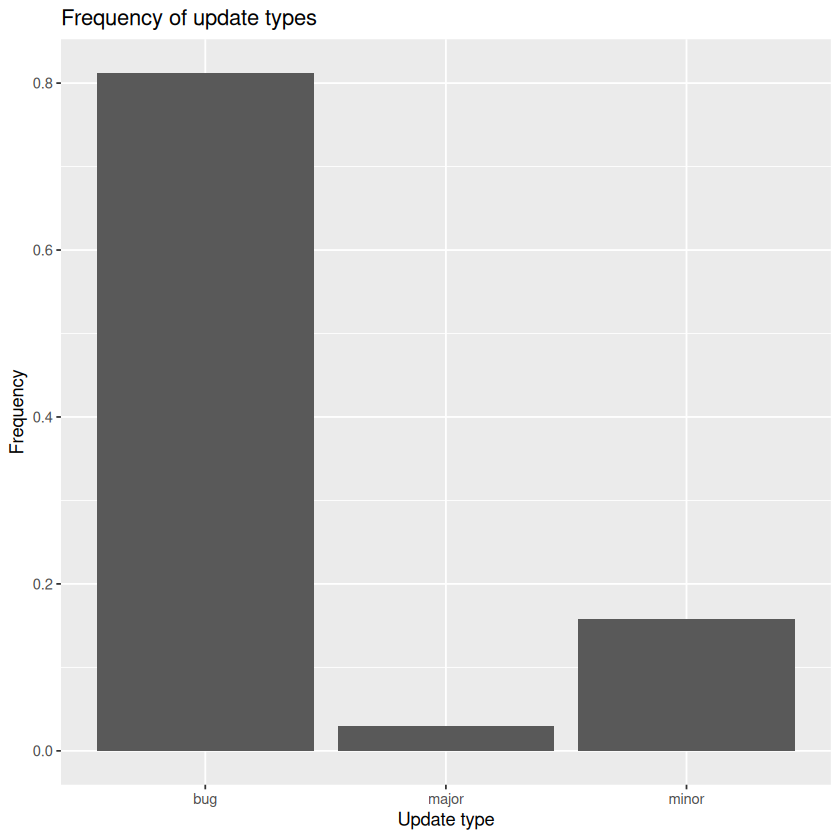

In [8]:
ggplot(df, aes(x = type, y = freq)) +
    geom_bar(stat = 'identity') +
    labs(
        title = 'Frequency of update types',
        x = 'Update type',
        y = 'Frequency'
    )
